# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

        
    
# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bf07decb51285129e7d8fc3985511c02&units=imperial&q='

In [5]:
# Set up lists to hold reponse info

existing_city=[]
city_errors=[]
lat = []
long = []
max_temp = []
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]
record_counter=0


print("Beginning Data Retrieval")
print("-"*20)
    
for city in cities:
    response=requests.get(query_url + city).json()

    
    try:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        existing_city.append(city)
        record_counter=record_counter+1
        print(f"Processing Record {record_counter} | {city}")
        
    except KeyError:
        city_errors.append(city)
        print(f"**{city} not found. Skipping...**")
        


Beginning Data Retrieval
--------------------
Processing Record 1 | Berdigestyakh
Processing Record 2 | Bredasdorp
Processing Record 3 | Lodja
Processing Record 4 | Sisimiut
**Nizhneyansk not found. Skipping...**
Processing Record 5 | Cukai
Processing Record 6 | Te anau
Processing Record 7 | Mataura
Processing Record 8 | Ushuaia
Processing Record 9 | Punta arenas
Processing Record 10 | Sioux lookout
Processing Record 11 | Busselton
Processing Record 12 | Georgetown
Processing Record 13 | Lumeje
Processing Record 14 | Kapaa
Processing Record 15 | Vaini
Processing Record 16 | Rikitea
Processing Record 17 | Ust-tsilma
Processing Record 18 | Mildura
**Illoqqortoormiut not found. Skipping...**
Processing Record 19 | Butaritari
Processing Record 20 | Itarema
Processing Record 21 | Hobart
Processing Record 22 | Gao
Processing Record 23 | Hermanus
Processing Record 24 | Puerto ayora
Processing Record 25 | Lakes entrance
Processing Record 26 | Lebu
Processing Record 27 | Carnarvon
Processing Re

Processing Record 223 | Qaqortoq
Processing Record 224 | Toppenish
Processing Record 225 | Ust-ilimsk
Processing Record 226 | Santiago del estero
Processing Record 227 | Nueva loja
Processing Record 228 | Srednekolymsk
Processing Record 229 | Katsuura
Processing Record 230 | Provideniya
Processing Record 231 | Voi
Processing Record 232 | Ancud
Processing Record 233 | Olafsvik
Processing Record 234 | Nome
Processing Record 235 | San quintin
Processing Record 236 | Merauke
Processing Record 237 | Brokopondo
**Marcona not found. Skipping...**
Processing Record 238 | Aksu
Processing Record 239 | Dubbo
Processing Record 240 | Meghri
Processing Record 241 | Bakchar
Processing Record 242 | Zhanakorgan
Processing Record 243 | Emba
Processing Record 244 | Lashio
Processing Record 245 | Bethel
Processing Record 246 | Hasaki
Processing Record 247 | Celestun
Processing Record 248 | Saint anthony
Processing Record 249 | Mountain home
Processing Record 250 | Oranjemund
Processing Record 251 | Tahe
P

Processing Record 452 | Chavakkad
Processing Record 453 | Pokrovsk
Processing Record 454 | Iracoubo
Processing Record 455 | Berlevag
Processing Record 456 | Santa rosa
Processing Record 457 | Marivan
Processing Record 458 | Lubumbashi
Processing Record 459 | Udachnyy
Processing Record 460 | Tagusao
**Sinkat not found. Skipping...**
Processing Record 461 | Paea
Processing Record 462 | Yumen
Processing Record 463 | Araxa
**Tidore not found. Skipping...**
Processing Record 464 | Erechim
Processing Record 465 | Buchanan
Processing Record 466 | Yar-sale
Processing Record 467 | Hambantota
Processing Record 468 | Gat
Processing Record 469 | Krasnyy chikoy
**Palabuhanratu not found. Skipping...**
**Labutta not found. Skipping...**
Processing Record 470 | Ugoofaaru
**Burica not found. Skipping...**
Processing Record 471 | Sandnessjoen
Processing Record 472 | Kalakamati
**Karaul not found. Skipping...**
Processing Record 473 | Northam
Processing Record 474 | Salalah
Processing Record 475 | Vila


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": existing_city,
    "Lat": lat,
    "Long": long,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv(output_data_file, index=False, header=True)

weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Berdigestyakh,62.0989,126.6992,62.40,60,100,2.53,RU,1628081162
1,Bredasdorp,-34.5322,20.0403,62.28,77,78,2.30,ZA,1628081162
2,Lodja,-3.4833,23.4333,105.53,14,17,1.14,CD,1628081162
3,Sisimiut,66.9395,-53.6735,46.81,88,99,6.06,GL,1628081163
4,Cukai,4.2500,103.4167,82.54,86,38,7.56,MY,1628081163


In [18]:
weather_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,19.489437,21.813569,71.345667,67.900000,53.648148,7.717407,1.628081e+09
std,33.409226,91.634632,15.258173,23.238004,40.478794,5.370621,7.366324e+01
min,-54.800000,-175.200000,29.010000,6.000000,0.000000,0.000000,1.628081e+09
25%,-8.106425,-61.158300,61.227500,54.000000,9.000000,3.705000,1.628081e+09
50%,21.850000,29.168200,72.970000,74.000000,64.500000,6.910000,1.628081e+09
75%,47.297300,105.450450,81.317500,86.000000,98.000000,10.360000,1.628081e+09
max,78.218600,179.316700,116.910000,100.000000,100.000000,33.380000,1.628081e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
weather_df[weather_df["Humidity"].astype(float)>100]


,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [20]:
#  Get the indices of cities that have humidity over 100%.

#****no cities with humidity over 100 found. *****

In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#n/a

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

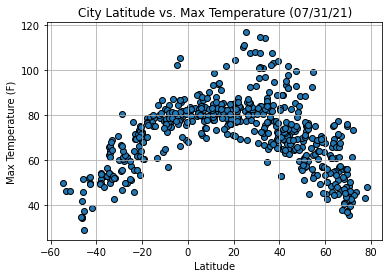

Analysis:
This plot is analyzing the current max temperatures at latitudes.
Temperatures appear to be higher as they get closer to latitude 20.
Temperatures decrease the further away they are from latitude 20 in either direction.


In [22]:
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.show()

print("Analysis:")
print("This plot is analyzing the current max temperatures at latitudes.")
print("Temperatures appear to be higher as they get closer to latitude 20.")
print("Temperatures decrease the further away they are from latitude 20 in either direction.")

## Latitude vs. Humidity Plot

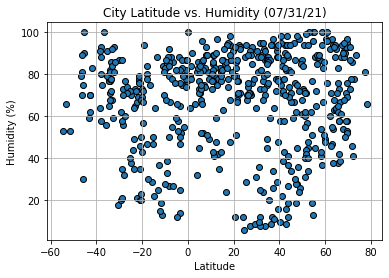

Analysis:
This plot is analyzing the current % of humidity at latitudes.
Humidity % exists across the board but appears to be more dense
at latitude 0.


In [23]:
x_values = weather_df["Lat"]
y_values = weather_df["Humidity"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title("City Latitude vs. Humidity (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

print("Analysis:")
print("This plot is analyzing the current % of humidity at latitudes.")
print("Humidity % exists across the board but appears to be more dense")
print("at latitude 0.")

## Latitude vs. Cloudiness Plot

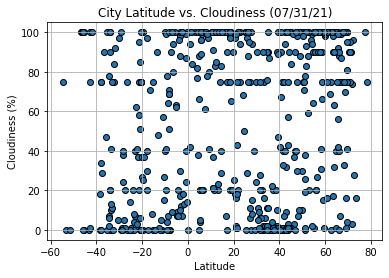

Analysis:
This plot is analyzing the current % of cloudiness at latitudes.
Cloudiness % appears to be more dense between latitude 0 and 25.


In [24]:
x_values = weather_df["Lat"]
y_values = weather_df["Cloudiness"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title("City Latitude vs. Cloudiness (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

print("Analysis:")
print("This plot is analyzing the current % of cloudiness at latitudes.")
print("Cloudiness % appears to be more dense between latitude 0 and 25.")

## Latitude vs. Wind Speed Plot

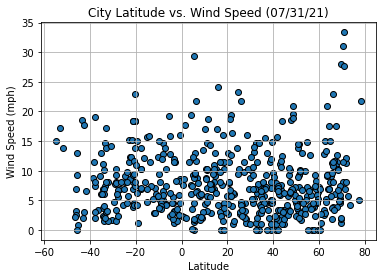

Analysis:
This plot is analyzing the current wind speed at latitudes.
Wind speed is mostly under 15mph but appears to increase more
the closer it is to latitudes 0 and 20.


In [25]:
x_values = weather_df["Lat"]
y_values = weather_df["Wind Speed"]
plt.scatter(x_values,y_values, edgecolor="black")
plt.title("City Latitude vs. Wind Speed (07/31/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.show()

print("Analysis:")
print("This plot is analyzing the current wind speed at latitudes.")
print("Wind speed is mostly under 15mph but appears to increase more")
print("the closer it is to latitudes 0 and 20.")

## Linear Regression

In [26]:
# Create reduced northern and southern hemisphere dataframes for linear regressions

northern_hem_df=weather_df[weather_df["Lat"]>=0]
southern_hem_df=weather_df[weather_df["Lat"]<0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6446032853895012
The p-value is: 5.985706877827737e-45


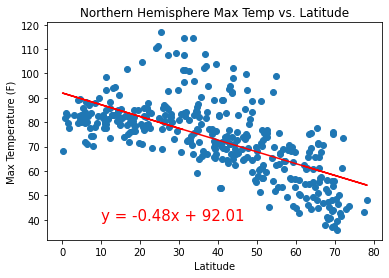

Analysis:
This plot is analyzing the current max temperature of cities
located in the northern hemisphere.
Many temps increase the closer they are to the equator.


In [31]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title('Northern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {r_value}")
print(f"The p-value is: {p_value}")
plt.show()

print('Analysis:')
print("This plot is analyzing the current max temperature of cities")
print("located in the northern hemisphere.")
print("Many temps increase the closer they are to the equator.")
print("The high r-value tells us it is representative of most of the data.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8438290457548968


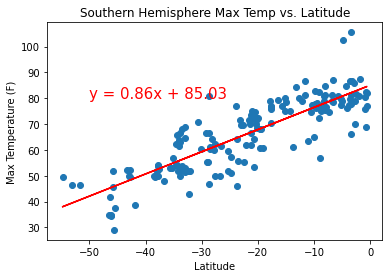

Analysis:
This plot is analyzing the current max temperature of cities
located in the southern hemisphere.
Like in the northern hemisphere, many temps increase the closer they are to the equator.
The correlation is true for about 77% based on the r-value.


In [32]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title('Southern Hemisphere Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {r_value}")
plt.show()

print('Analysis:')
print("This plot is analyzing the current max temperature of cities")
print("located in the southern hemisphere.")
print("Like in the northern hemisphere, many temps increase the closer they are to the equator.")
print("The high r-value tells us it is representative of most of the data.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0615917671174838


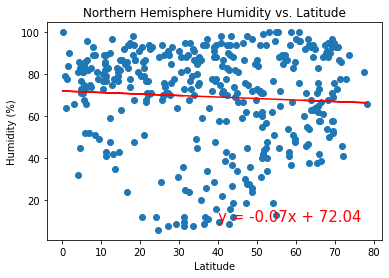

Analysis:
This plot is analyzing the current humidity of cities
located in the northern hemisphere.
Humidity seems mid to high for most cities in the northern hemisphere.
There is a slight positive correlation closer to the equator.
The correlation is true for about 3% based on the r-value.


In [33]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title('Northern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {r_value}")
plt.show()

print('Analysis:')
print("This plot is analyzing the current humidity of cities")
print("located in the northern hemisphere.")
print("Humidity seems mid to high for most cities in the northern hemisphere.")
print("There is a slight positive correlation closer to the equator.")
print("The low r-value tells us it is not representative of most of the data.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.13878738408572866


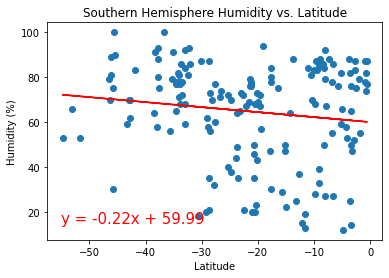

Analysis:
This plot is analyzing the current humidity of cities
located in the southern hemisphere.
Humidity seems mid to high for most cities in the southern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The correlation is true for about 5% based on the r-value.


In [34]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title('Southern Hemisphere Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {r_value}")
plt.show()

print('Analysis:')
print("This plot is analyzing the current humidity of cities")
print("located in the southern hemisphere.")
print("Humidity seems mid to high for most cities in the southern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0051293071435889615


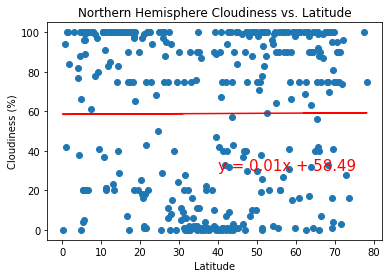

Analysis:
This plot is analyzing the current cloudiness of cities
located in the northern hemisphere.
Cloudiness is split between extremely cloudy or not cloudy at all.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data
but we can see on the graph that number is being swayed by both ends of the spectrum.


In [36]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title('Northern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {r_value}")
plt.show()

print('Analysis:')
print("This plot is analyzing the current cloudiness of cities")
print("located in the northern hemisphere.")
print("Cloudiness is split between extremely cloudy or not cloudy at all.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")
print("but we can see on the graph that number is being swayed by both ends of the spectrum.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04566048860271311


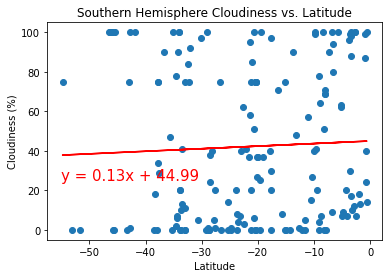

Analysis:
This plot is analyzing the current cloudiness of cities
located in the southern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [37]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.title('Southern Hemisphere Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {r_value}")
plt.show()

print('Analysis:')
print("This plot is analyzing the current cloudiness of cities")
print("located in the southern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.030757596247607426


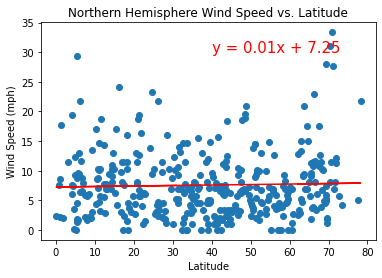

Analysis:
This plot is analyzing the current wind speed of cities
located in the northern hemisphere.
There is a slight positive correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [38]:
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title('Northern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {r_value}")
plt.show()

print('Analysis:')
print("This plot is analyzing the current wind speed of cities")
print("located in the northern hemisphere.")
print("There is a slight positive correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.042529628911253614


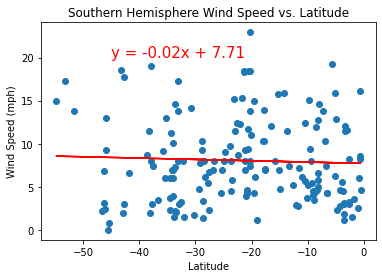

Analysis:
This plot is analyzing the current wind speed of cities
located in the southern hemisphere.
There is a slight negative correlation for cities closer to the equator.
The low r-value tells us it is not representative of most of the data


In [40]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]
slope, intercept, r_value, p_value, stderr = linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")
plt.title('Southern Hemisphere Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {r_value}")
plt.show()

print('Analysis:')
print("This plot is analyzing the current wind speed of cities")
print("located in the southern hemisphere.")
print("There is a slight negative correlation for cities closer to the equator.")
print("The low r-value tells us it is not representative of most of the data")